heat_1d_boundary_sin_exact: Average time with 25 tries: 0.0004 seconds
finite_difference_crank_nicolson: Average time with 25 tries: 0.0067 seconds


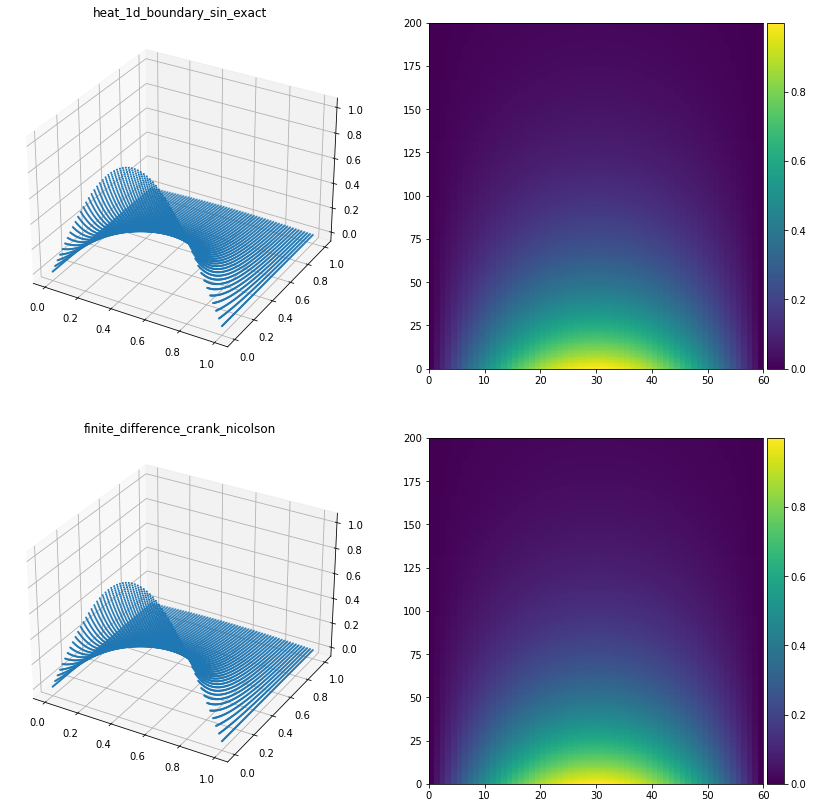

In [2]:
from heat import *
from heat_pinn import *

TIMER_REPEAT_TIMES = 25

@dataclass
class QuantConstParam(HeatConstParam):
    mean_abs_error_threshold = 0.01
    def __str__(self) -> str:
        rs = super().__str__()
        rs = rs + "mean_abs_error_threshold: {}".format(self.mean_abs_error_threshold)
        return rs

def get_above_threshold(mae_dist_model, threshold):
    filtered = [m for m in mae_dist_model if m[1] >= threshold]
    if len(filtered) == 0:
        return None
    min_mae_dist_model = min(filtered, key=lambda x: float(x[1]))
    return min_mae_dist_model

# Generate constants throughout this app!!
const_params = QuantConstParam()

solve_analytical_and_numerical(const_params, timer_repeat_times = TIMER_REPEAT_TIMES)

plotter = Plotter(2, 2)
plot_analytical_and_numerical(plotter, const_params)

In [3]:
hidden_layers = [3, 2, 1]
hidden_layer_sizes = [20, 15, 10, 5, 3]

# # Small test
# hidden_layers = [3]
# hidden_layer_sizes = [20, 15]

plot_results = []
mae_dist_models = []
for layer in hidden_layers:
    size_maes = []
    for size in hidden_layer_sizes:
        pinn_params = PinnParam()
        pinn_params.nn_hidden_layer_num = layer
        pinn_params.nn_hidden_layer_size = size
        geomtime_data, model = create_model(const_params, pinn_params)
        losshistory, train_state = train_model(model)
        mae = compute_mean_abs_error(const_params.y_analytical, model.predict(const_params.X_test))
        dist = np.abs(mae - const_params.mean_abs_error_threshold)
        mae_dist_models.append([mae, dist, model, pinn_params])
        size_maes.append(mae)
    plot_results.append([layer, hidden_layer_sizes, size_maes])


Compiling model...
Building feed-forward neural network...
'build' took 0.029834 s



/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.223366 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [9.01e-03, 1.13e-02, 5.79e-01]    [9.03e-03, 1.13e-02, 5.79e-01]    []  


2021-12-14 17:04:18.036867: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:196] None of the MLIR optimization passes are enabled (registered 0 passes)
2021-12-14 17:04:18.059162: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3593345000 Hz


1000      [2.24e-03, 1.31e-03, 4.95e-04]    [1.19e-03, 1.31e-03, 4.95e-04]    []  
2000      [3.07e-04, 1.50e-04, 3.53e-05]    [1.83e-04, 1.50e-04, 3.53e-05]    []  
3000      [1.06e-04, 2.76e-05, 3.18e-05]    [7.12e-05, 2.76e-05, 3.18e-05]    []  
4000      [7.35e-05, 2.10e-05, 2.94e-05]    [4.91e-05, 2.10e-05, 2.94e-05]    []  
5000      [4.02e-05, 1.46e-05, 2.82e-06]    [2.74e-05, 1.46e-05, 2.82e-06]    []  
6000      [2.24e-04, 2.43e-05, 1.21e-04]    [1.71e-04, 2.43e-05, 1.21e-04]    []  
7000      [2.05e-05, 8.24e-06, 2.95e-06]    [1.53e-05, 8.24e-06, 2.95e-06]    []  
8000      [7.22e-05, 8.13e-05, 1.77e-04]    [6.23e-05, 8.13e-05, 1.77e-04]    []  
9000      [1.13e-05, 2.93e-06, 7.01e-07]    [8.78e-06, 2.93e-06, 7.01e-07]    []  
10000     [5.89e-05, 2.54e-05, 9.32e-06]    [4.39e-05, 2.54e-05, 9.32e-06]    []  
11000     [1.02e-05, 2.88e-06, 4.76e-06]    [8.18e-06, 2.88e-06, 4.76e-06]    []  
12000     [1.09e-05, 1.74e-06, 3.65e-07]    [8.38e-06, 1.74e-06, 3.65e-07]    []  
1300

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.193269 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [3.20e-02, 1.42e-02, 7.16e-01]    [3.05e-02, 1.42e-02, 7.16e-01]    []  
1000      [2.79e-03, 1.33e-03, 1.88e-03]    [1.32e-03, 1.33e-03, 1.88e-03]    []  
2000      [6.44e-04, 1.45e-04, 1.38e-04]    [4.02e-04, 1.45e-04, 1.38e-04]    []  
3000      [4.28e-04, 1.02e-04, 1.04e-04]    [2.89e-04, 1.02e-04, 1.04e-04]    []  
4000      [2.98e-04, 5.05e-05, 5.46e-05]    [2.04e-04, 5.05e-05, 5.46e-05]    []  
5000      [2.30e-04, 4.06e-05, 4.26e-05]    [1.57e-04, 4.06e-05, 4.26e-05]    []  
6000      [1.85e-04, 3.71e-05, 4.06e-05]    [1.24e-04, 3.71e-05, 4.06e-05]    []  
7000      [1.43e-04, 2.40e-05, 2.60e-05]    [9.35e-05, 2.40e-05, 2.60e-05]    []  
8000      [1.10e-04, 1.98e-05, 2.06e-05]    [6.99e-05, 1.98e-05, 2.06e-05]    []  
9000      [8.83e-05, 1.06e-05, 1.11e-05]    [5.60e-05, 1.06e-05, 1.11e-05]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.226889 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [8.55e-03, 2.57e-02, 3.28e-01]    [8.21e-03, 2.57e-02, 3.28e-01]    []  
1000      [1.68e-03, 4.81e-04, 3.33e-04]    [1.06e-03, 4.81e-04, 3.33e-04]    []  
2000      [4.10e-04, 1.45e-04, 9.14e-05]    [2.67e-04, 1.45e-04, 9.14e-05]    []  
3000      [1.93e-04, 6.81e-05, 4.13e-05]    [1.37e-04, 6.81e-05, 4.13e-05]    []  
4000      [1.38e-04, 3.90e-05, 2.32e-05]    [1.03e-04, 3.90e-05, 2.32e-05]    []  
5000      [1.05e-04, 2.48e-05, 1.42e-05]    [7.92e-05, 2.48e-05, 1.42e-05]    []  
6000      [8.10e-05, 1.68e-05, 8.90e-06]    [6.29e-05, 1.68e-05, 8.90e-06]    []  
7000      [6.39e-05, 1.21e-05, 5.64e-06]    [5.04e-05, 1.21e-05, 5.64e-06]    []  
8000      [5.13e-05, 9.04e-06, 3.58e-06]    [4.01e-05, 9.04e-06, 3.58e-06]    []  
9000      [4.71e-05, 8.10e-06, 2.33e-06]    [3.81e-05, 8.10e-06, 2.33e-06]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.230242 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [4.61e-02, 7.68e-02, 2.42e-01]    [4.86e-02, 7.68e-02, 2.42e-01]    []  
1000      [7.80e-03, 6.86e-03, 8.93e-03]    [5.24e-03, 6.86e-03, 8.93e-03]    []  
2000      [1.39e-03, 3.71e-04, 2.71e-04]    [7.34e-04, 3.71e-04, 2.71e-04]    []  
3000      [5.97e-04, 8.61e-05, 5.16e-05]    [3.08e-04, 8.61e-05, 5.16e-05]    []  
4000      [4.22e-04, 3.83e-05, 3.75e-05]    [2.30e-04, 3.83e-05, 3.75e-05]    []  
5000      [3.11e-04, 2.96e-05, 3.06e-05]    [1.69e-04, 2.96e-05, 3.06e-05]    []  
6000      [2.32e-04, 2.71e-05, 2.49e-05]    [1.26e-04, 2.71e-05, 2.49e-05]    []  
7000      [1.78e-04, 2.61e-05, 2.20e-05]    [9.87e-05, 2.61e-05, 2.20e-05]    []  
8000      [1.34e-04, 2.31e-05, 1.54e-05]    [7.40e-05, 2.31e-05, 1.54e-05]    []  
9000      [1.06e-04, 2.05e-05, 1.20e-05]    [5.87e-05, 2.05e-05, 1.20e-05]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.236220 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [6.82e-02, 1.80e-02, 7.37e-01]    [6.99e-02, 1.80e-02, 7.37e-01]    []  
1000      [2.34e-02, 6.15e-02, 1.19e-01]    [2.10e-02, 6.15e-02, 1.19e-01]    []  
2000      [8.99e-03, 1.44e-02, 2.31e-02]    [6.49e-03, 1.44e-02, 2.31e-02]    []  
3000      [7.67e-03, 8.16e-03, 8.11e-03]    [4.90e-03, 8.16e-03, 8.11e-03]    []  
4000      [5.42e-03, 4.90e-03, 2.71e-03]    [3.38e-03, 4.90e-03, 2.71e-03]    []  
5000      [3.23e-03, 2.85e-03, 7.33e-04]    [2.35e-03, 2.85e-03, 7.33e-04]    []  
6000      [2.14e-03, 1.97e-03, 3.30e-04]    [1.66e-03, 1.97e-03, 3.30e-04]    []  
7000      [1.58e-03, 1.47e-03, 1.83e-04]    [1.22e-03, 1.47e-03, 1.83e-04]    []  
8000      [1.12e-03, 1.07e-03, 9.08e-05]    [8.40e-04, 1.07e-03, 9.08e-05]    []  
9000      [7.75e-04, 6.90e-04, 2.27e-05]    [5.69e-04, 6.90e-04, 2.27e-05]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.221931 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [2.17e-03, 1.82e-02, 3.87e-01]    [2.33e-03, 1.82e-02, 3.87e-01]    []  
1000      [1.53e-03, 3.06e-04, 9.35e-04]    [9.92e-04, 3.06e-04, 9.35e-04]    []  
2000      [5.49e-04, 9.60e-05, 1.42e-04]    [4.18e-04, 9.60e-05, 1.42e-04]    []  
3000      [3.25e-04, 2.50e-05, 5.76e-05]    [2.54e-04, 2.50e-05, 5.76e-05]    []  
4000      [1.87e-04, 9.16e-06, 2.03e-05]    [1.48e-04, 9.16e-06, 2.03e-05]    []  
5000      [1.10e-04, 9.04e-06, 1.00e-05]    [8.46e-05, 9.04e-06, 1.00e-05]    []  
6000      [6.76e-05, 8.47e-06, 6.11e-06]    [5.06e-05, 8.47e-06, 6.11e-06]    []  
7000      [4.56e-05, 6.32e-06, 5.23e-06]    [3.46e-05, 6.32e-06, 5.23e-06]    []  
8000      [3.42e-05, 5.51e-06, 2.64e-06]    [2.56e-05, 5.51e-06, 2.64e-06]    []  
9000      [2.79e-05, 4.03e-06, 2.09e-06]    [2.13e-05, 4.03e-06, 2.09e-06]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.213123 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.84e-02, 2.33e-03, 5.62e-01]    [1.95e-02, 2.33e-03, 5.62e-01]    []  
1000      [5.38e-03, 3.24e-03, 6.98e-03]    [3.55e-03, 3.24e-03, 6.98e-03]    []  
2000      [1.25e-03, 5.96e-04, 2.95e-04]    [8.57e-04, 5.96e-04, 2.95e-04]    []  
3000      [5.05e-04, 1.69e-04, 9.31e-05]    [3.47e-04, 1.69e-04, 9.31e-05]    []  
4000      [2.58e-04, 9.45e-05, 5.49e-05]    [1.72e-04, 9.45e-05, 5.49e-05]    []  
5000      [1.64e-04, 6.85e-05, 3.33e-05]    [1.06e-04, 6.85e-05, 3.33e-05]    []  
6000      [1.26e-04, 5.29e-05, 2.14e-05]    [8.03e-05, 5.29e-05, 2.14e-05]    []  
7000      [1.01e-04, 4.04e-05, 1.33e-05]    [5.96e-05, 4.04e-05, 1.33e-05]    []  
8000      [8.73e-05, 3.25e-05, 8.91e-06]    [5.01e-05, 3.25e-05, 8.91e-06]    []  
9000      [7.75e-05, 2.72e-05, 6.41e-06]    [4.43e-05, 2.72e-05, 6.41e-06]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.225799 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.09e-01, 9.67e-02, 2.72e-01]    [1.08e-01, 9.67e-02, 2.72e-01]    []  
1000      [5.52e-03, 1.12e-02, 1.71e-02]    [3.31e-03, 1.12e-02, 1.71e-02]    []  
2000      [2.46e-03, 1.20e-03, 1.69e-03]    [1.47e-03, 1.20e-03, 1.69e-03]    []  
3000      [1.04e-03, 4.05e-04, 5.43e-04]    [7.15e-04, 4.05e-04, 5.43e-04]    []  
4000      [6.01e-04, 1.45e-04, 1.54e-04]    [3.93e-04, 1.45e-04, 1.54e-04]    []  
5000      [3.55e-04, 4.92e-05, 4.66e-05]    [2.17e-04, 4.92e-05, 4.66e-05]    []  
6000      [2.37e-04, 2.09e-05, 1.84e-05]    [1.43e-04, 2.09e-05, 1.84e-05]    []  
7000      [1.73e-04, 1.12e-05, 9.54e-06]    [1.05e-04, 1.12e-05, 9.54e-06]    []  
8000      [1.32e-04, 7.24e-06, 5.68e-06]    [8.00e-05, 7.24e-06, 5.68e-06]    []  
9000      [1.06e-04, 5.49e-06, 3.61e-06]    [6.39e-05, 5.49e-06, 3.61e-06]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.232259 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.89e-01, 3.27e-01, 1.62e-01]    [1.99e-01, 3.27e-01, 1.62e-01]    []  
1000      [1.16e-02, 2.61e-02, 5.21e-02]    [9.65e-03, 2.61e-02, 5.21e-02]    []  
2000      [8.86e-03, 8.03e-03, 1.25e-02]    [5.61e-03, 8.03e-03, 1.25e-02]    []  
3000      [4.72e-03, 2.20e-03, 1.73e-03]    [3.08e-03, 2.20e-03, 1.73e-03]    []  
4000      [2.65e-03, 9.76e-04, 3.19e-04]    [1.86e-03, 9.76e-04, 3.19e-04]    []  
5000      [1.64e-03, 5.00e-04, 9.06e-05]    [1.20e-03, 5.00e-04, 9.06e-05]    []  
6000      [1.17e-03, 2.18e-04, 3.43e-05]    [8.69e-04, 2.18e-04, 3.43e-05]    []  
7000      [8.14e-04, 9.72e-05, 1.79e-05]    [6.10e-04, 9.72e-05, 1.79e-05]    []  
8000      [5.79e-04, 5.91e-05, 1.25e-05]    [4.38e-04, 5.91e-05, 1.25e-05]    []  
9000      [4.47e-04, 4.34e-05, 1.03e-05]    [3.41e-04, 4.34e-05, 1.03e-05]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.275432 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.93e-01, 4.80e-01, 1.15e+00]    [1.78e-01, 4.80e-01, 1.15e+00]    []  
1000      [2.86e-02, 4.18e-02, 9.16e-02]    [2.47e-02, 4.18e-02, 9.16e-02]    []  
2000      [2.05e-02, 3.72e-02, 7.44e-02]    [1.74e-02, 3.72e-02, 7.44e-02]    []  
3000      [1.27e-02, 3.40e-02, 5.53e-02]    [1.01e-02, 3.40e-02, 5.53e-02]    []  
4000      [1.05e-02, 2.88e-02, 4.54e-02]    [8.70e-03, 2.88e-02, 4.54e-02]    []  
5000      [1.28e-02, 1.47e-02, 2.74e-02]    [1.09e-02, 1.47e-02, 2.74e-02]    []  
6000      [9.09e-03, 8.39e-03, 1.50e-02]    [6.70e-03, 8.39e-03, 1.50e-02]    []  
7000      [5.61e-03, 1.91e-03, 2.29e-03]    [3.83e-03, 1.91e-03, 2.29e-03]    []  
8000      [2.85e-03, 5.94e-04, 3.50e-04]    [2.09e-03, 5.94e-04, 3.50e-04]    []  
9000      [2.05e-03, 3.55e-04, 1.50e-04]    [1.56e-03, 3.55e-04, 1.50e-04]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.234837 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.19e-01, 6.96e-02, 4.08e-01]    [1.20e-01, 6.96e-02, 4.08e-01]    []  
1000      [7.90e-03, 3.33e-02, 5.33e-02]    [6.13e-03, 3.33e-02, 5.33e-02]    []  
2000      [8.40e-03, 1.43e-02, 2.57e-02]    [5.64e-03, 1.43e-02, 2.57e-02]    []  
3000      [6.21e-03, 2.74e-03, 6.46e-03]    [4.61e-03, 2.74e-03, 6.46e-03]    []  
4000      [5.22e-03, 1.96e-03, 4.61e-03]    [3.98e-03, 1.96e-03, 4.61e-03]    []  
5000      [3.51e-03, 1.02e-03, 2.55e-03]    [2.59e-03, 1.02e-03, 2.55e-03]    []  
6000      [1.47e-03, 3.51e-04, 5.90e-04]    [1.06e-03, 3.51e-04, 5.90e-04]    []  
7000      [1.10e-03, 2.58e-04, 3.16e-04]    [8.06e-04, 2.58e-04, 3.16e-04]    []  
8000      [8.31e-04, 1.80e-04, 1.58e-04]    [6.18e-04, 1.80e-04, 1.58e-04]    []  
9000      [6.63e-04, 1.37e-04, 9.97e-05]    [4.87e-04, 1.37e-04, 9.97e-05]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.216802 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [5.82e-02, 9.64e-02, 8.35e-01]    [5.72e-02, 9.64e-02, 8.35e-01]    []  
1000      [1.66e-02, 3.94e-02, 8.06e-02]    [1.40e-02, 3.94e-02, 8.06e-02]    []  
2000      [1.27e-02, 2.74e-02, 4.64e-02]    [1.00e-02, 2.74e-02, 4.64e-02]    []  
3000      [6.62e-03, 8.27e-03, 2.12e-02]    [3.84e-03, 8.27e-03, 2.12e-02]    []  
4000      [9.19e-03, 4.00e-03, 1.03e-02]    [6.79e-03, 4.00e-03, 1.03e-02]    []  
5000      [6.86e-03, 2.96e-03, 7.42e-03]    [5.12e-03, 2.96e-03, 7.42e-03]    []  
6000      [4.86e-03, 1.83e-03, 4.48e-03]    [3.67e-03, 1.83e-03, 4.48e-03]    []  
7000      [2.36e-03, 1.31e-03, 2.07e-03]    [1.62e-03, 1.31e-03, 2.07e-03]    []  
8000      [2.03e-03, 4.92e-04, 9.29e-04]    [1.55e-03, 4.92e-04, 9.29e-04]    []  
9000      [1.90e-03, 3.39e-04, 7.04e-04]    [1.45e-03, 3.39e-04, 7.04e-04]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.233127 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [3.84e-01, 1.25e-01, 4.69e-01]    [3.85e-01, 1.25e-01, 4.69e-01]    []  
1000      [1.20e-02, 4.24e-02, 8.77e-02]    [9.73e-03, 4.24e-02, 8.77e-02]    []  
2000      [8.58e-03, 3.51e-02, 5.75e-02]    [6.93e-03, 3.51e-02, 5.75e-02]    []  
3000      [8.55e-03, 2.78e-02, 4.06e-02]    [7.05e-03, 2.78e-02, 4.06e-02]    []  
4000      [9.48e-03, 1.70e-02, 3.08e-02]    [7.63e-03, 1.70e-02, 3.08e-02]    []  
5000      [9.17e-03, 5.66e-03, 1.32e-02]    [6.81e-03, 5.66e-03, 1.32e-02]    []  
6000      [5.50e-03, 4.57e-03, 8.34e-03]    [4.00e-03, 4.57e-03, 8.34e-03]    []  
7000      [4.95e-03, 3.24e-03, 5.79e-03]    [3.66e-03, 3.24e-03, 5.79e-03]    []  
8000      [4.33e-03, 2.12e-03, 4.15e-03]    [3.22e-03, 2.12e-03, 4.15e-03]    []  
9000      [2.26e-03, 6.00e-04, 1.06e-03]    [1.79e-03, 6.00e-04, 1.06e-03]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.261714 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [3.20e-02, 7.26e-01, 2.03e-01]    [3.14e-02, 7.26e-01, 2.03e-01]    []  
1000      [9.20e-03, 5.84e-02, 1.26e-01]    [8.46e-03, 5.84e-02, 1.26e-01]    []  
2000      [1.68e-02, 3.77e-02, 7.49e-02]    [1.44e-02, 3.77e-02, 7.49e-02]    []  
3000      [1.31e-02, 2.49e-02, 4.83e-02]    [1.06e-02, 2.49e-02, 4.83e-02]    []  
4000      [1.28e-02, 2.44e-02, 4.07e-02]    [1.13e-02, 2.44e-02, 4.07e-02]    []  
5000      [1.11e-02, 1.76e-02, 2.99e-02]    [9.06e-03, 1.76e-02, 2.99e-02]    []  
6000      [1.24e-02, 8.72e-03, 1.95e-02]    [9.61e-03, 8.72e-03, 1.95e-02]    []  
7000      [1.35e-02, 6.04e-03, 1.47e-02]    [1.07e-02, 6.04e-03, 1.47e-02]    []  
8000      [1.32e-02, 5.47e-03, 1.34e-02]    [1.06e-02, 5.47e-03, 1.34e-02]    []  
9000      [1.25e-02, 5.24e-03, 1.26e-02]    [1.01e-02, 5.24e-03, 1.26e-02]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_

'compile' took 0.353741 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [5.71e-02, 3.80e-01, 1.42e+00]    [5.76e-02, 3.80e-01, 1.42e+00]    []  
1000      [1.93e-02, 7.56e-02, 1.40e-01]    [1.76e-02, 7.56e-02, 1.40e-01]    []  
2000      [2.10e-02, 4.53e-02, 9.64e-02]    [1.81e-02, 4.53e-02, 9.64e-02]    []  
3000      [2.07e-02, 3.78e-02, 7.92e-02]    [1.79e-02, 3.78e-02, 7.92e-02]    []  
4000      [1.81e-02, 3.65e-02, 7.22e-02]    [1.58e-02, 3.65e-02, 7.22e-02]    []  
5000      [1.49e-02, 3.65e-02, 6.74e-02]    [1.31e-02, 3.65e-02, 6.74e-02]    []  
6000      [1.14e-02, 3.76e-02, 6.33e-02]    [1.02e-02, 3.76e-02, 6.33e-02]    []  
7000      [8.35e-03, 3.93e-02, 6.07e-02]    [7.73e-03, 3.93e-02, 6.07e-02]    []  
8000      [6.70e-03, 4.06e-02, 5.96e-02]    [6.38e-03, 4.06e-02, 5.96e-02]    []  
9000      [5.95e-03, 4.12e-02, 5.88e-02]    [5.70e-03, 4.12e-02, 5.88e-02]    []  
10000   

Training model...

Step      Train loss                        Test loss                         Test metric
20011     [7.77e-03, 3.71e-02, 5.15e-02]    [7.18e-03, 3.71e-02, 5.15e-02]    []  
INFO:tensorflow:Optimization terminated with:
  Message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  Objective function value: 0.096356
  Number of iterations: 1
  Number of functions evaluations: 17
20028     [7.77e-03, 3.71e-02, 5.15e-02]    [7.18e-03, 3.71e-02, 5.15e-02]    []  

Best model at step 20011:
  train loss: 9.64e-02
  test loss: 9.58e-02
  test metric: []

'train' took 1.152631 s

NN prediction: Average time with 25 tries: 0.0150 seconds


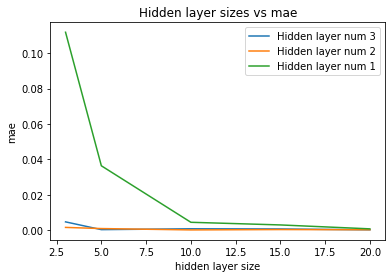

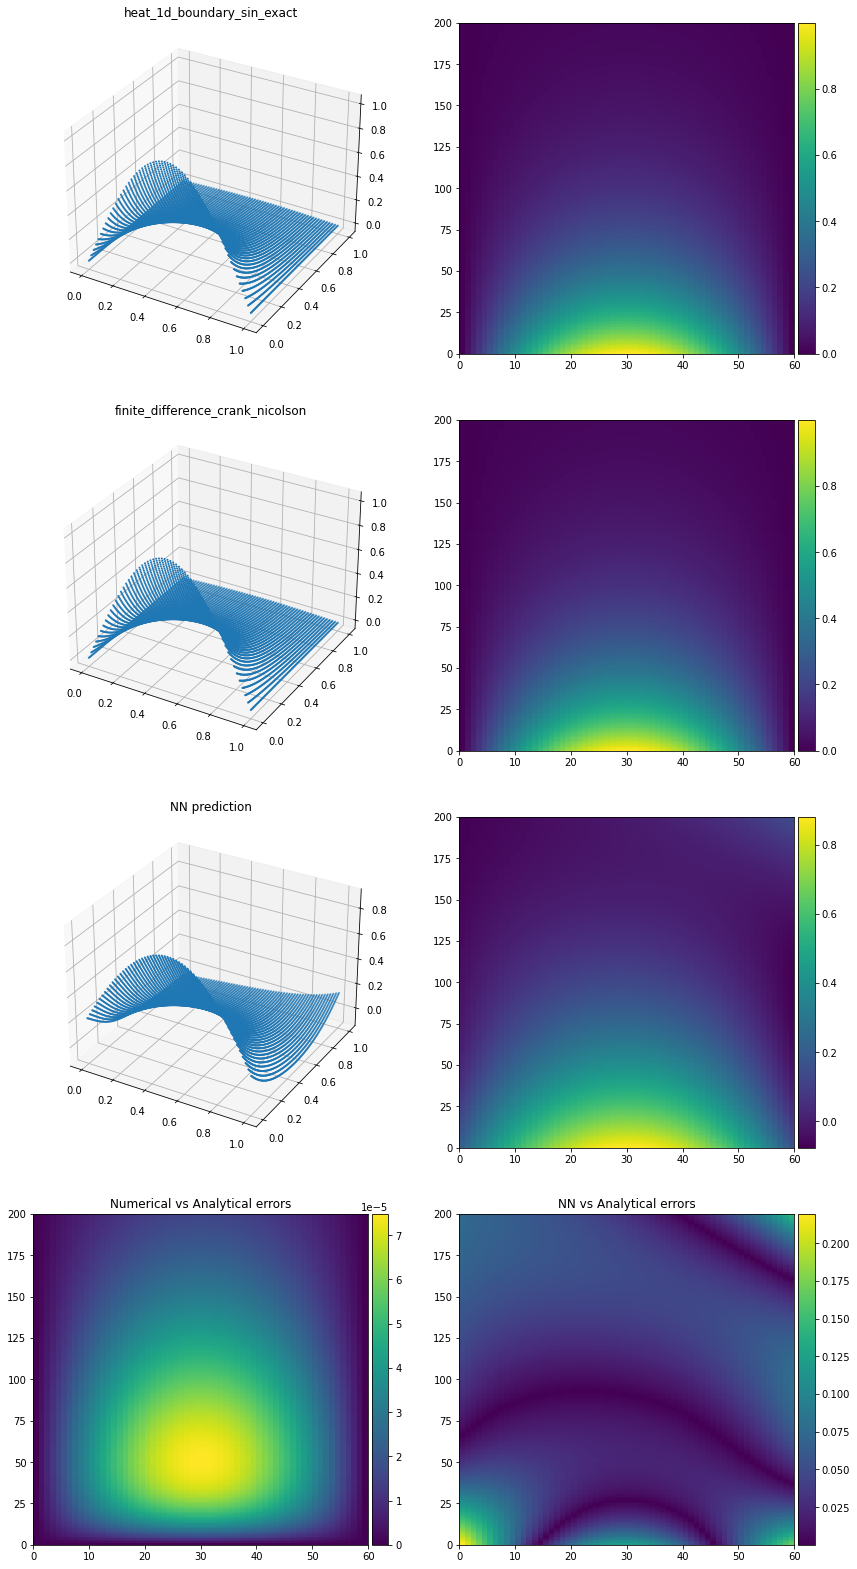

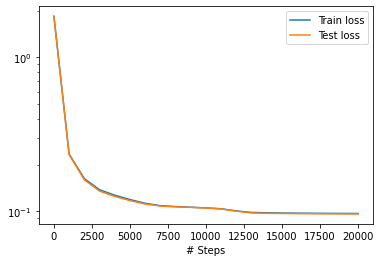

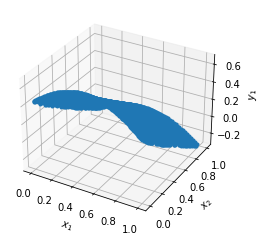

IGNORE ^^^ PDE test data SOLUTION PLOT!!! ^^^
--- Numerical vs Analytical Report ---
Mean absolute error:  2.9059873630420946e-05
Mean squared error:  1.26415187285393e-09
Max error:  7.483296180527121e-05
--- NN vs Analytical Report ---
Mean absolute error:  0.036355724580648494
Mean squared error:  0.0019771985048944976
Max error:  0.2193908393383026
Heat Const Param: 
a: 0.4
L: 1
n: 1
t_end: 1
test_x_dim: 60
test_t_dim: 200
analytical_function_name: heat_1d_boundary_sin_exact
numerical_function_name: finite_difference_crank_nicolson
mean_abs_error_threshold: 0.01
Pinn Param: 
d_num_domain: 2540
d_num_boundary: 80
d_num_initial: 160
nn_hidden_layer_size: 5
nn_hidden_layer_num: 1



In [4]:
import matplotlib.pyplot as plt

def plot_line(results):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    for result in results:
        ax.plot(result[1], result[2], label =  "Hidden layer num" + " {}".format(result[0]))
    ax.legend()
    ax.set_xlabel("hidden layer size")
    ax.set_ylabel("mae")
    ax.title.set_text("Hidden layer sizes vs mae")
plot_line(plot_results)

# Find model just above the threshold
mae_dist_model = get_above_threshold(mae_dist_models, const_params.mean_abs_error_threshold)
# If not found, just find the model with max mae
if(mae_dist_model == None):
    print("No broken model found, where mae is above threshold {}".format(const_params.mean_abs_error_threshold))
else:
    losshistory, train_state = model.train()
    predict_and_output_report(
        mae_dist_model[2],
        heat_params=const_params,
        pinn_params=mae_dist_model[3],
        timer_repeat_times=TIMER_REPEAT_TIMES,
        losshistory=losshistory,
        train_state = train_state)

# Test 2: Reduce train data (domain and bc) to break solution

In [5]:
num_domains = [2540, 100, 50, 10]
num_bcs = [100, 26, 10, 4]

# # Small test
# num_domains = [10]
# num_bcs = [10, 4]

plot_results = []
mae_dist_models = []
for num_domain in num_domains:
    num_bc_maes = []
    for num_bc in num_bcs:
        pinn_params = PinnParam()
        pinn_params.d_num_domain = int(num_domain)
        pinn_params.d_num_boundary = int(num_bc/2)
        pinn_params.d_num_initial = int(num_bc/2)
        geomtime_data, model = create_model(const_params, pinn_params)
        losshistory, train_state = train_model(model)
        mae = compute_mean_abs_error(const_params.y_analytical, model.predict(const_params.X_test))
        dist = np.abs(mae - const_params.mean_abs_error_threshold)
        mae_dist_models.append([mae, dist, model, pinn_params])
        num_bc_maes.append(mae)
    plot_results.append([num_domain, num_bcs, num_bc_maes])


Compiling model...
Building feed-forward neural network...
'build' took 0.026156 s



/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+52=52. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/

'compile' took 0.350570 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [3.06e-02, 1.98e-02, 5.61e-01]    [3.05e-02, 1.98e-02, 5.61e-01]    []  
1000      [1.18e-03, 4.62e-04, 1.52e-04]    [8.01e-04, 4.62e-04, 1.52e-04]    []  
2000      [1.09e-04, 9.58e-06, 2.74e-06]    [7.15e-05, 9.58e-06, 2.74e-06]    []  
3000      [5.21e-05, 4.26e-06, 7.73e-07]    [3.34e-05, 4.26e-06, 7.73e-07]    []  
4000      [3.03e-05, 2.52e-06, 2.33e-07]    [1.83e-05, 2.52e-06, 2.33e-07]    []  
5000      [2.18e-05, 1.93e-06, 8.34e-08]    [1.30e-05, 1.93e-06, 8.34e-08]    []  
6000      [1.65e-05, 1.64e-06, 5.46e-08]    [1.04e-05, 1.64e-06, 5.46e-08]    []  
7000      [1.37e-05, 1.48e-06, 3.95e-08]    [8.87e-06, 1.48e-06, 3.95e-08]    []  
8000      [1.19e-05, 1.48e-06, 1.38e-07]    [7.98e-06, 1.48e-06, 1.38e-07]    []  
9000      [3.33e-05, 1.12e-05, 4.67e-06]    [3.00e-05, 1.12e-05, 4.67e-06]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+15=15. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/

'compile' took 0.347044 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [2.51e-02, 4.15e-02, 7.45e-01]    [2.44e-02, 4.15e-02, 7.45e-01]    []  
1000      [1.22e-03, 1.11e-03, 1.25e-03]    [9.02e-04, 1.11e-03, 1.25e-03]    []  
2000      [3.52e-04, 1.74e-04, 7.56e-05]    [2.62e-04, 1.74e-04, 7.56e-05]    []  
3000      [1.56e-04, 4.03e-05, 3.95e-05]    [1.21e-04, 4.03e-05, 3.95e-05]    []  
4000      [8.36e-05, 9.09e-06, 1.59e-05]    [6.67e-05, 9.09e-06, 1.59e-05]    []  
5000      [4.98e-05, 6.06e-06, 1.08e-05]    [3.92e-05, 6.06e-06, 1.08e-05]    []  
6000      [3.03e-05, 4.74e-06, 8.36e-06]    [2.34e-05, 4.74e-06, 8.36e-06]    []  
7000      [1.97e-05, 3.98e-06, 7.92e-06]    [1.47e-05, 3.98e-06, 7.92e-06]    []  
8000      [1.18e-05, 3.12e-06, 5.24e-06]    [8.78e-06, 3.12e-06, 5.24e-06]    []  
9000      [7.83e-06, 2.59e-06, 4.04e-06]    [5.69e-06, 2.59e-06, 4.04e-06]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+7=7. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/ba

'compile' took 0.373274 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.34e-02, 1.28e-01, 2.58e-01]    [1.34e-02, 1.28e-01, 2.58e-01]    []  
1000      [1.25e-03, 4.89e-04, 1.15e-03]    [1.09e-03, 4.89e-04, 1.15e-03]    []  
2000      [3.48e-04, 1.04e-05, 9.79e-05]    [2.84e-04, 1.04e-05, 9.79e-05]    []  
3000      [1.30e-04, 4.36e-06, 1.95e-05]    [9.79e-05, 4.36e-06, 1.95e-05]    []  
4000      [6.86e-05, 4.75e-06, 9.79e-06]    [5.17e-05, 4.75e-06, 9.79e-06]    []  
5000      [4.59e-05, 3.46e-06, 5.20e-06]    [3.43e-05, 3.46e-06, 5.20e-06]    []  
6000      [3.69e-05, 3.63e-06, 4.10e-06]    [2.77e-05, 3.63e-06, 4.10e-06]    []  
7000      [2.68e-05, 3.22e-06, 3.29e-06]    [1.94e-05, 3.22e-06, 3.29e-06]    []  
8000      [2.10e-05, 3.01e-06, 2.83e-06]    [1.50e-05, 3.01e-06, 2.83e-06]    []  
9000      [1.76e-05, 2.89e-06, 2.43e-06]    [1.25e-05, 2.89e-06, 2.43e-06]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2021-12-14 17:16:08.613039: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices

'compile' took 0.390487 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [3.05e-02, 1.10e-02, 5.47e-01]    [3.00e-02, 1.10e-02, 5.47e-01]    []  
1000      [3.07e-04, 3.54e-06, 4.83e-06]    [2.70e-04, 3.54e-06, 4.83e-06]    []  
2000      [1.30e-04, 3.06e-07, 1.06e-06]    [1.19e-04, 3.06e-07, 1.06e-06]    []  
3000      [8.08e-05, 1.46e-07, 3.80e-07]    [7.43e-05, 1.46e-07, 3.80e-07]    []  
4000      [5.72e-05, 8.66e-08, 1.96e-07]    [5.23e-05, 8.66e-08, 1.96e-07]    []  
5000      [4.29e-05, 1.30e-07, 1.00e-07]    [3.90e-05, 1.30e-07, 1.00e-07]    []  
6000      [3.36e-05, 5.40e-07, 6.27e-07]    [3.03e-05, 5.40e-07, 6.27e-07]    []  
7000      [2.67e-05, 3.50e-07, 4.50e-07]    [2.40e-05, 3.50e-07, 4.50e-07]    []  
8000      [2.25e-05, 6.53e-06, 5.22e-06]    [2.01e-05, 6.53e-06, 5.22e-06]    []  
9000      [2.12e-05, 1.69e-05, 1.79e-05]    [1.91e-05, 1.69e-05, 1.79e-05]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+102=102. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+52=52. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/ba

'compile' took 0.446238 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [4.99e-02, 9.12e-03, 4.56e-01]    [5.53e-02, 9.12e-03, 4.56e-01]    []  
1000      [8.53e-04, 4.72e-04, 2.83e-04]    [9.22e-04, 4.72e-04, 2.83e-04]    []  
2000      [2.39e-04, 5.05e-05, 4.29e-05]    [3.19e-04, 5.05e-05, 4.29e-05]    []  
3000      [1.07e-04, 3.27e-05, 1.83e-05]    [1.70e-04, 3.27e-05, 1.83e-05]    []  
4000      [7.26e-05, 1.76e-05, 1.13e-05]    [1.19e-04, 1.76e-05, 1.13e-05]    []  
5000      [5.54e-05, 9.81e-06, 7.17e-06]    [9.32e-05, 9.81e-06, 7.17e-06]    []  
6000      [4.14e-05, 5.45e-06, 5.00e-06]    [6.65e-05, 5.45e-06, 5.00e-06]    []  
7000      [3.25e-05, 3.81e-06, 3.61e-06]    [5.41e-05, 3.81e-06, 3.61e-06]    []  
8000      [5.35e-05, 5.19e-06, 3.74e-06]    [7.46e-05, 5.19e-06, 3.74e-06]    []  
9000      [2.24e-05, 2.39e-06, 2.46e-06]    [3.69e-05, 2.39e-06, 2.46e-06]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+102=102. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+15=15. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/ba

'compile' took 0.414492 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [5.25e-02, 6.63e-02, 7.47e-01]    [5.07e-02, 6.63e-02, 7.47e-01]    []  
1000      [1.72e-03, 1.26e-03, 1.86e-03]    [2.36e-03, 1.26e-03, 1.86e-03]    []  
2000      [4.88e-04, 2.20e-04, 1.55e-04]    [5.29e-03, 2.20e-04, 1.55e-04]    []  
3000      [1.55e-04, 6.60e-05, 5.86e-05]    [5.12e-03, 6.60e-05, 5.86e-05]    []  
4000      [1.59e-04, 4.12e-05, 3.03e-05]    [3.11e-03, 4.12e-05, 3.03e-05]    []  
5000      [5.53e-05, 2.42e-05, 2.13e-05]    [2.17e-03, 2.42e-05, 2.13e-05]    []  
6000      [4.32e-05, 1.49e-05, 1.86e-05]    [1.67e-03, 1.49e-05, 1.86e-05]    []  
7000      [3.75e-05, 1.15e-05, 1.14e-05]    [1.30e-03, 1.15e-05, 1.14e-05]    []  
8000      [3.05e-05, 8.94e-06, 8.81e-06]    [1.06e-03, 8.94e-06, 8.81e-06]    []  
9000      [2.59e-05, 7.65e-06, 6.99e-06]    [8.67e-04, 7.65e-06, 6.99e-06]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+102=102. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+7=7. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base

'compile' took 0.431984 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.20e-03, 1.57e-03, 5.33e-01]    [1.33e-03, 1.57e-03, 5.33e-01]    []  
1000      [1.01e-03, 1.30e-04, 3.22e-04]    [5.68e-03, 1.30e-04, 3.22e-04]    []  
2000      [2.00e-04, 2.53e-05, 2.70e-05]    [2.19e-03, 2.53e-05, 2.70e-05]    []  
3000      [9.38e-05, 1.50e-05, 8.16e-06]    [1.06e-03, 1.50e-05, 8.16e-06]    []  
4000      [5.09e-05, 1.05e-05, 2.84e-06]    [6.01e-04, 1.05e-05, 2.84e-06]    []  
5000      [2.72e-05, 7.27e-06, 8.70e-07]    [3.62e-04, 7.27e-06, 8.70e-07]    []  
6000      [1.67e-05, 5.05e-06, 1.79e-07]    [2.88e-04, 5.05e-06, 1.79e-07]    []  
7000      [1.95e-05, 1.62e-05, 9.17e-06]    [2.81e-04, 1.62e-05, 9.17e-06]    []  
8000      [9.90e-06, 3.31e-06, 1.29e-07]    [3.08e-04, 3.31e-06, 1.29e-07]    []  
9000      [6.85e-06, 2.43e-06, 8.31e-08]    [3.30e-04, 2.43e-06, 8.31e-08]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+102=102. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2021-12-14 17:18:10.959926: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, 

'compile' took 0.451505 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.49e-01, 2.37e-01, 1.25e-01]    [1.43e-01, 2.37e-01, 1.25e-01]    []  
1000      [2.33e-04, 3.30e-06, 6.22e-06]    [2.63e-04, 3.30e-06, 6.22e-06]    []  
2000      [5.88e-05, 9.72e-08, 2.33e-07]    [6.32e-05, 9.72e-08, 2.33e-07]    []  
3000      [3.32e-05, 1.20e-07, 3.99e-08]    [3.52e-05, 1.20e-07, 3.99e-08]    []  
4000      [2.20e-05, 8.28e-08, 1.49e-08]    [2.33e-05, 8.28e-08, 1.49e-08]    []  
5000      [1.64e-05, 1.71e-08, 1.03e-08]    [1.75e-05, 1.71e-08, 1.03e-08]    []  
6000      [1.31e-05, 4.64e-09, 1.03e-08]    [1.41e-05, 4.64e-09, 1.03e-08]    []  
7000      [1.08e-05, 1.02e-08, 3.96e-09]    [1.17e-05, 1.02e-08, 3.96e-09]    []  
8000      [9.13e-06, 1.13e-07, 3.45e-08]    [9.89e-06, 1.13e-07, 3.45e-08]    []  
9000      [7.96e-06, 4.92e-09, 2.00e-08]    [8.58e-06, 4.92e-09, 2.00e-08]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+52=52. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2021-12-14 17:18:28.774824: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf

'compile' took 0.462658 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [6.23e-03, 5.95e-03, 5.53e-01]    [5.27e-03, 5.95e-03, 5.53e-01]    []  
1000      [1.19e-03, 4.88e-04, 4.99e-04]    [1.04e-03, 4.88e-04, 4.99e-04]    []  
2000      [1.91e-04, 4.11e-05, 3.93e-05]    [4.81e-04, 4.11e-05, 3.93e-05]    []  
3000      [1.17e-04, 2.80e-05, 1.86e-05]    [2.88e-04, 2.80e-05, 1.86e-05]    []  
4000      [5.83e-05, 1.41e-05, 9.46e-06]    [1.63e-04, 1.41e-05, 9.46e-06]    []  
5000      [4.35e-05, 9.45e-06, 5.75e-06]    [1.16e-04, 9.45e-06, 5.75e-06]    []  
6000      [3.49e-05, 7.68e-06, 3.69e-06]    [9.27e-05, 7.68e-06, 3.69e-06]    []  
7000      [2.90e-05, 6.69e-06, 2.47e-06]    [7.90e-05, 6.69e-06, 2.47e-06]    []  
8000      [2.49e-05, 5.85e-06, 1.71e-06]    [6.99e-05, 5.85e-06, 1.71e-06]    []  
9000      [2.70e-05, 5.82e-06, 1.41e-06]    [7.01e-05, 5.82e-06, 1.41e-06]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+52=52. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+15=15. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base

'compile' took 0.472047 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [2.69e-01, 6.94e-02, 4.37e-01]    [2.53e-01, 6.94e-02, 4.37e-01]    []  
1000      [1.92e-03, 2.25e-03, 2.71e-03]    [1.10e-03, 2.25e-03, 2.71e-03]    []  
2000      [5.30e-04, 8.63e-05, 1.56e-04]    [7.64e-04, 8.63e-05, 1.56e-04]    []  
3000      [2.50e-04, 3.56e-05, 6.61e-05]    [3.67e-04, 3.56e-05, 6.61e-05]    []  
4000      [1.13e-04, 1.84e-05, 3.44e-05]    [1.70e-04, 1.84e-05, 3.44e-05]    []  
5000      [4.51e-04, 5.30e-05, 2.33e-04]    [3.37e-04, 5.30e-05, 2.33e-04]    []  
6000      [2.70e-05, 7.60e-06, 1.44e-05]    [4.69e-05, 7.60e-06, 1.44e-05]    []  
7000      [1.88e-05, 6.63e-06, 1.14e-05]    [3.82e-05, 6.63e-06, 1.14e-05]    []  
8000      [1.40e-05, 5.85e-06, 8.87e-06]    [3.04e-05, 5.85e-06, 8.87e-06]    []  
9000      [1.71e-05, 1.87e-05, 2.87e-05]    [3.59e-05, 1.87e-05, 2.87e-05]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+52=52. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+7=7. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_l

'compile' took 0.484670 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [2.41e-02, 3.58e-01, 1.24e+00]    [2.06e-02, 3.58e-01, 1.24e+00]    []  
1000      [2.81e-03, 2.04e-03, 1.22e-02]    [2.16e-03, 2.04e-03, 1.22e-02]    []  
2000      [1.03e-03, 4.08e-05, 6.27e-04]    [1.69e-03, 4.08e-05, 6.27e-04]    []  
3000      [1.47e-04, 3.89e-06, 1.31e-05]    [4.48e-04, 3.89e-06, 1.31e-05]    []  
4000      [5.02e-05, 1.59e-06, 1.14e-06]    [3.57e-04, 1.59e-06, 1.14e-06]    []  
5000      [3.52e-05, 1.36e-06, 8.81e-07]    [3.90e-04, 1.36e-06, 8.81e-07]    []  
6000      [2.80e-05, 1.03e-06, 7.70e-07]    [4.09e-04, 1.03e-06, 7.70e-07]    []  
7000      [1.88e-04, 6.52e-06, 3.06e-05]    [4.49e-04, 6.52e-06, 3.06e-05]    []  
8000      [1.87e-05, 8.32e-07, 1.01e-07]    [3.63e-04, 8.32e-07, 1.01e-07]    []  
9000      [1.68e-05, 1.04e-06, 3.59e-07]    [3.31e-04, 1.04e-06, 3.59e-07]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+52=52. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2021-12-14 17:19:26.758420: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf

'compile' took 0.513027 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.07e-01, 2.02e-02, 4.84e-01]    [1.08e-01, 2.02e-02, 4.84e-01]    []  
1000      [9.54e-05, 2.74e-07, 1.66e-07]    [2.87e-04, 2.74e-07, 1.66e-07]    []  
2000      [3.55e-05, 4.02e-08, 7.64e-09]    [1.59e-04, 4.02e-08, 7.64e-09]    []  
3000      [1.74e-05, 5.59e-07, 2.98e-07]    [9.33e-05, 5.59e-07, 2.98e-07]    []  
4000      [9.68e-06, 1.10e-07, 6.28e-08]    [5.93e-05, 1.10e-07, 6.28e-08]    []  
5000      [1.25e-05, 6.26e-05, 5.85e-05]    [3.94e-05, 6.26e-05, 5.85e-05]    []  
6000      [4.51e-06, 3.75e-08, 2.50e-08]    [3.08e-05, 3.75e-08, 2.50e-08]    []  
7000      [3.93e-06, 4.04e-06, 3.85e-06]    [2.71e-05, 4.04e-06, 3.85e-06]    []  
8000      [3.01e-06, 2.02e-08, 1.45e-08]    [2.06e-05, 2.02e-08, 1.45e-08]    []  
9000      [2.57e-06, 3.84e-09, 1.04e-09]    [1.74e-05, 3.84e-09, 1.04e-09]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+12=12. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+52=52. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base

'compile' took 0.533662 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [4.12e-01, 1.37e-01, 4.09e-01]    [3.93e-01, 1.37e-01, 4.09e-01]    []  
1000      [1.97e-03, 1.20e-03, 2.13e-03]    [4.02e-02, 1.20e-03, 2.13e-03]    []  
2000      [8.91e-04, 7.14e-05, 2.01e-04]    [1.59e-03, 7.14e-05, 2.01e-04]    []  
3000      [1.57e-03, 7.59e-05, 2.01e-04]    [2.82e-03, 7.59e-05, 2.01e-04]    []  
4000      [1.70e-03, 4.01e-05, 1.92e-04]    [4.72e-03, 4.01e-05, 1.92e-04]    []  
5000      [1.30e-05, 8.24e-06, 1.58e-05]    [3.43e-03, 8.24e-06, 1.58e-05]    []  
6000      [6.77e-06, 5.25e-06, 1.03e-05]    [3.74e-03, 5.25e-06, 1.03e-05]    []  
7000      [5.92e-06, 3.48e-06, 7.71e-06]    [4.20e-03, 3.48e-06, 7.71e-06]    []  
8000      [2.70e-05, 3.01e-06, 6.65e-06]    [4.47e-03, 3.01e-06, 6.65e-06]    []  
9000      [5.03e-06, 2.11e-06, 4.46e-06]    [4.75e-03, 2.11e-06, 4.46e-06]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+12=12. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+15=15. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base

'compile' took 0.538506 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [4.39e-01, 1.16e-01, 4.91e-01]    [4.72e-01, 1.16e-01, 4.91e-01]    []  
1000      [2.01e-03, 4.08e-03, 3.73e-03]    [7.38e-03, 4.08e-03, 3.73e-03]    []  
2000      [4.79e-04, 8.98e-05, 7.38e-05]    [5.43e-03, 8.98e-05, 7.38e-05]    []  
3000      [1.16e-04, 1.66e-05, 2.75e-05]    [1.58e-03, 1.66e-05, 2.75e-05]    []  
4000      [5.10e-05, 4.70e-06, 1.83e-05]    [1.09e-03, 4.70e-06, 1.83e-05]    []  
5000      [1.44e-04, 8.40e-06, 2.02e-05]    [1.28e-03, 8.40e-06, 2.02e-05]    []  
6000      [1.93e-05, 1.11e-06, 1.01e-05]    [9.13e-04, 1.11e-06, 1.01e-05]    []  
7000      [8.11e-05, 3.05e-06, 1.58e-05]    [1.13e-03, 3.05e-06, 1.58e-05]    []  
8000      [1.35e-05, 6.92e-07, 6.32e-06]    [9.01e-04, 6.92e-07, 6.32e-06]    []  
9000      [1.83e-04, 5.22e-05, 1.79e-04]    [7.40e-04, 5.22e-05, 1.79e-04]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+12=12. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+7=7. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_l

'compile' took 0.736392 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.26e-01, 4.40e-02, 5.57e-01]    [1.32e-01, 4.40e-02, 5.57e-01]    []  
1000      [9.10e-04, 1.89e-03, 3.98e-03]    [5.96e-03, 1.89e-03, 3.98e-03]    []  
2000      [2.53e-04, 3.24e-06, 5.29e-06]    [2.89e-02, 3.24e-06, 5.29e-06]    []  
3000      [1.41e-04, 9.18e-06, 8.66e-07]    [2.26e-02, 9.18e-06, 8.66e-07]    []  
4000      [3.64e-05, 7.15e-06, 9.97e-07]    [2.09e-02, 7.15e-06, 9.97e-07]    []  
5000      [1.76e-05, 7.49e-06, 1.29e-06]    [2.02e-02, 7.49e-06, 1.29e-06]    []  
6000      [9.34e-06, 6.49e-06, 1.13e-06]    [1.96e-02, 6.49e-06, 1.13e-06]    []  
7000      [4.59e-04, 4.55e-05, 1.73e-06]    [1.90e-02, 4.55e-05, 1.73e-06]    []  
8000      [1.39e-05, 7.67e-06, 2.87e-06]    [1.83e-02, 7.67e-06, 2.87e-06]    []  
9000      [6.83e-06, 2.91e-06, 4.71e-07]    [1.77e-02, 2.91e-06, 4.71e-07]    []  
10000   

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+12=12. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2021-12-14 17:20:47.967461: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf

'compile' took 0.617323 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.21e-01, 5.28e-02, 6.91e-01]    [1.37e-01, 5.28e-02, 6.91e-01]    []  
1000      [1.17e-04, 1.09e-06, 2.03e-06]    [1.23e-02, 1.09e-06, 2.03e-06]    []  
2000      [4.96e-06, 1.53e-08, 2.04e-10]    [1.12e-02, 1.53e-08, 2.04e-10]    []  
3000      [1.06e-06, 7.66e-10, 1.15e-09]    [1.08e-02, 7.66e-10, 1.15e-09]    []  
4000      [2.46e-07, 5.94e-11, 2.17e-10]    [1.06e-02, 5.94e-11, 2.17e-10]    []  
5000      [6.28e-08, 5.88e-11, 2.79e-11]    [1.06e-02, 5.88e-11, 2.79e-11]    []  
6000      [2.09e-08, 1.35e-11, 5.08e-12]    [1.07e-02, 1.35e-11, 5.08e-12]    []  
7000      [2.84e-08, 9.16e-08, 4.39e-08]    [1.08e-02, 9.16e-08, 4.39e-08]    []  
8000      [7.29e-06, 2.47e-05, 1.28e-05]    [1.07e-02, 2.47e-05, 1.28e-05]    []  
9000      [3.56e-09, 2.48e-11, 1.86e-11]    [1.10e-02, 2.48e-11, 1.86e-11]    []  
10000   

Training model...

Step      Train loss                        Test loss                         Test metric
20073     [3.13e-10, 1.06e-13, 4.44e-14]    [1.32e-02, 1.06e-13, 4.44e-14]    []  
INFO:tensorflow:Optimization terminated with:
  Message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  Objective function value: 0.000000
  Number of iterations: 1
  Number of functions evaluations: 23
20096     [3.13e-10, 1.06e-13, 4.44e-14]    [1.32e-02, 1.06e-13, 4.44e-14]    []  

Best model at step 20073:
  train loss: 3.13e-10
  test loss: 1.32e-02
  test metric: []

'train' took 4.143328 s

NN prediction: Average time with 25 tries: 0.0616 seconds


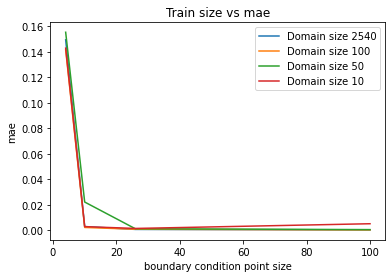

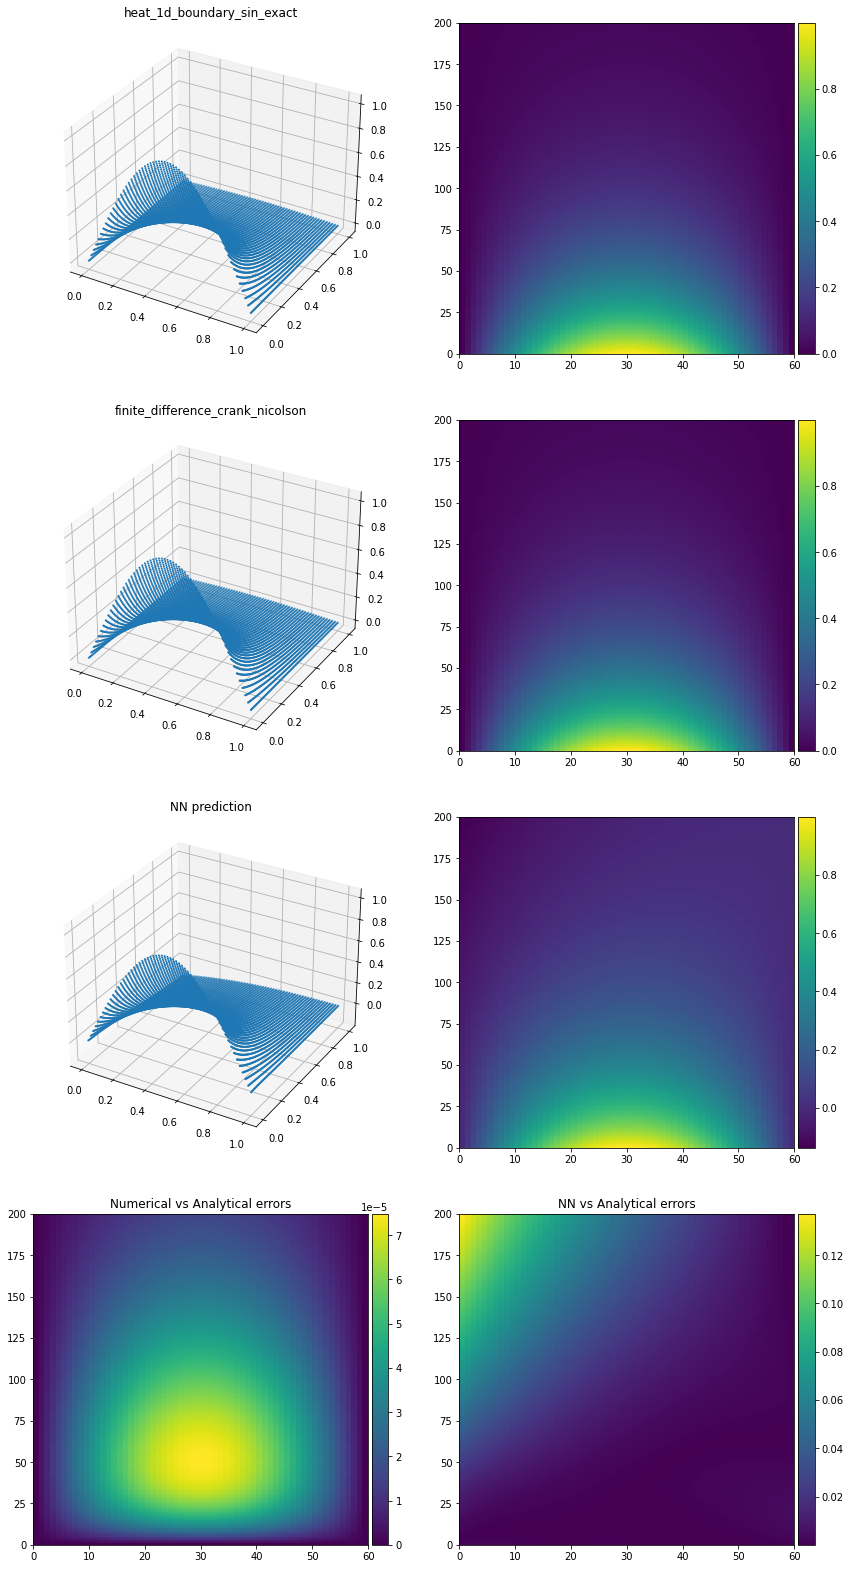

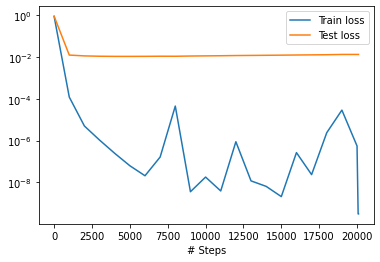

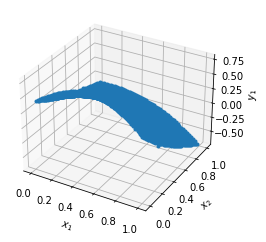

IGNORE ^^^ PDE test data SOLUTION PLOT!!! ^^^
--- Numerical vs Analytical Report ---
Mean absolute error:  2.9059873630420946e-05
Mean squared error:  1.26415187285393e-09
Max error:  7.483296180527121e-05
--- NN vs Analytical Report ---
Mean absolute error:  0.02216619588065782
Mean squared error:  0.0012912831113020497
Max error:  0.137056365609169
Heat Const Param: 
a: 0.4
L: 1
n: 1
t_end: 1
test_x_dim: 60
test_t_dim: 200
analytical_function_name: heat_1d_boundary_sin_exact
numerical_function_name: finite_difference_crank_nicolson
mean_abs_error_threshold: 0.01
Pinn Param: 
d_num_domain: 50
d_num_boundary: 5
d_num_initial: 5
nn_hidden_layer_size: 20
nn_hidden_layer_num: 3



In [6]:
import matplotlib.pyplot as plt

def plot_line(results):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    for result in results:
        ax.plot(result[1], result[2], label =  "Domain size" + " {}".format(result[0]))
    ax.legend()
    ax.set_xlabel("boundary condition point size")
    ax.set_ylabel("mae")
    ax.title.set_text("Train size vs mae")
plot_line(plot_results)

# Find model just above the threshold
mae_dist_model = get_above_threshold(mae_dist_models, const_params.mean_abs_error_threshold)
# If not found, just find the model with max mae
if(mae_dist_model == None):
    print("No broken model found, where mae is above threshold {}".format(const_params.mean_abs_error_threshold))
else:
    losshistory, train_state = model.train()
    predict_and_output_report(
        mae_dist_model[2],
        heat_params=const_params,
        pinn_params=mae_dist_model[3],
        timer_repeat_times=TIMER_REPEAT_TIMES,
        losshistory=losshistory,
        train_state = train_state)